In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
from modules import get_data
import pandas as pd

In [9]:
X, y, train_data, proc_test_data, test_data = get_data()

0
0


accuracy = 0.7694720257068763


SelectFromModel(estimator=RandomForestClassifier(max_depth=8, n_estimators=300,
                                                 n_jobs=-1, oob_score=True),
                threshold=0.1)

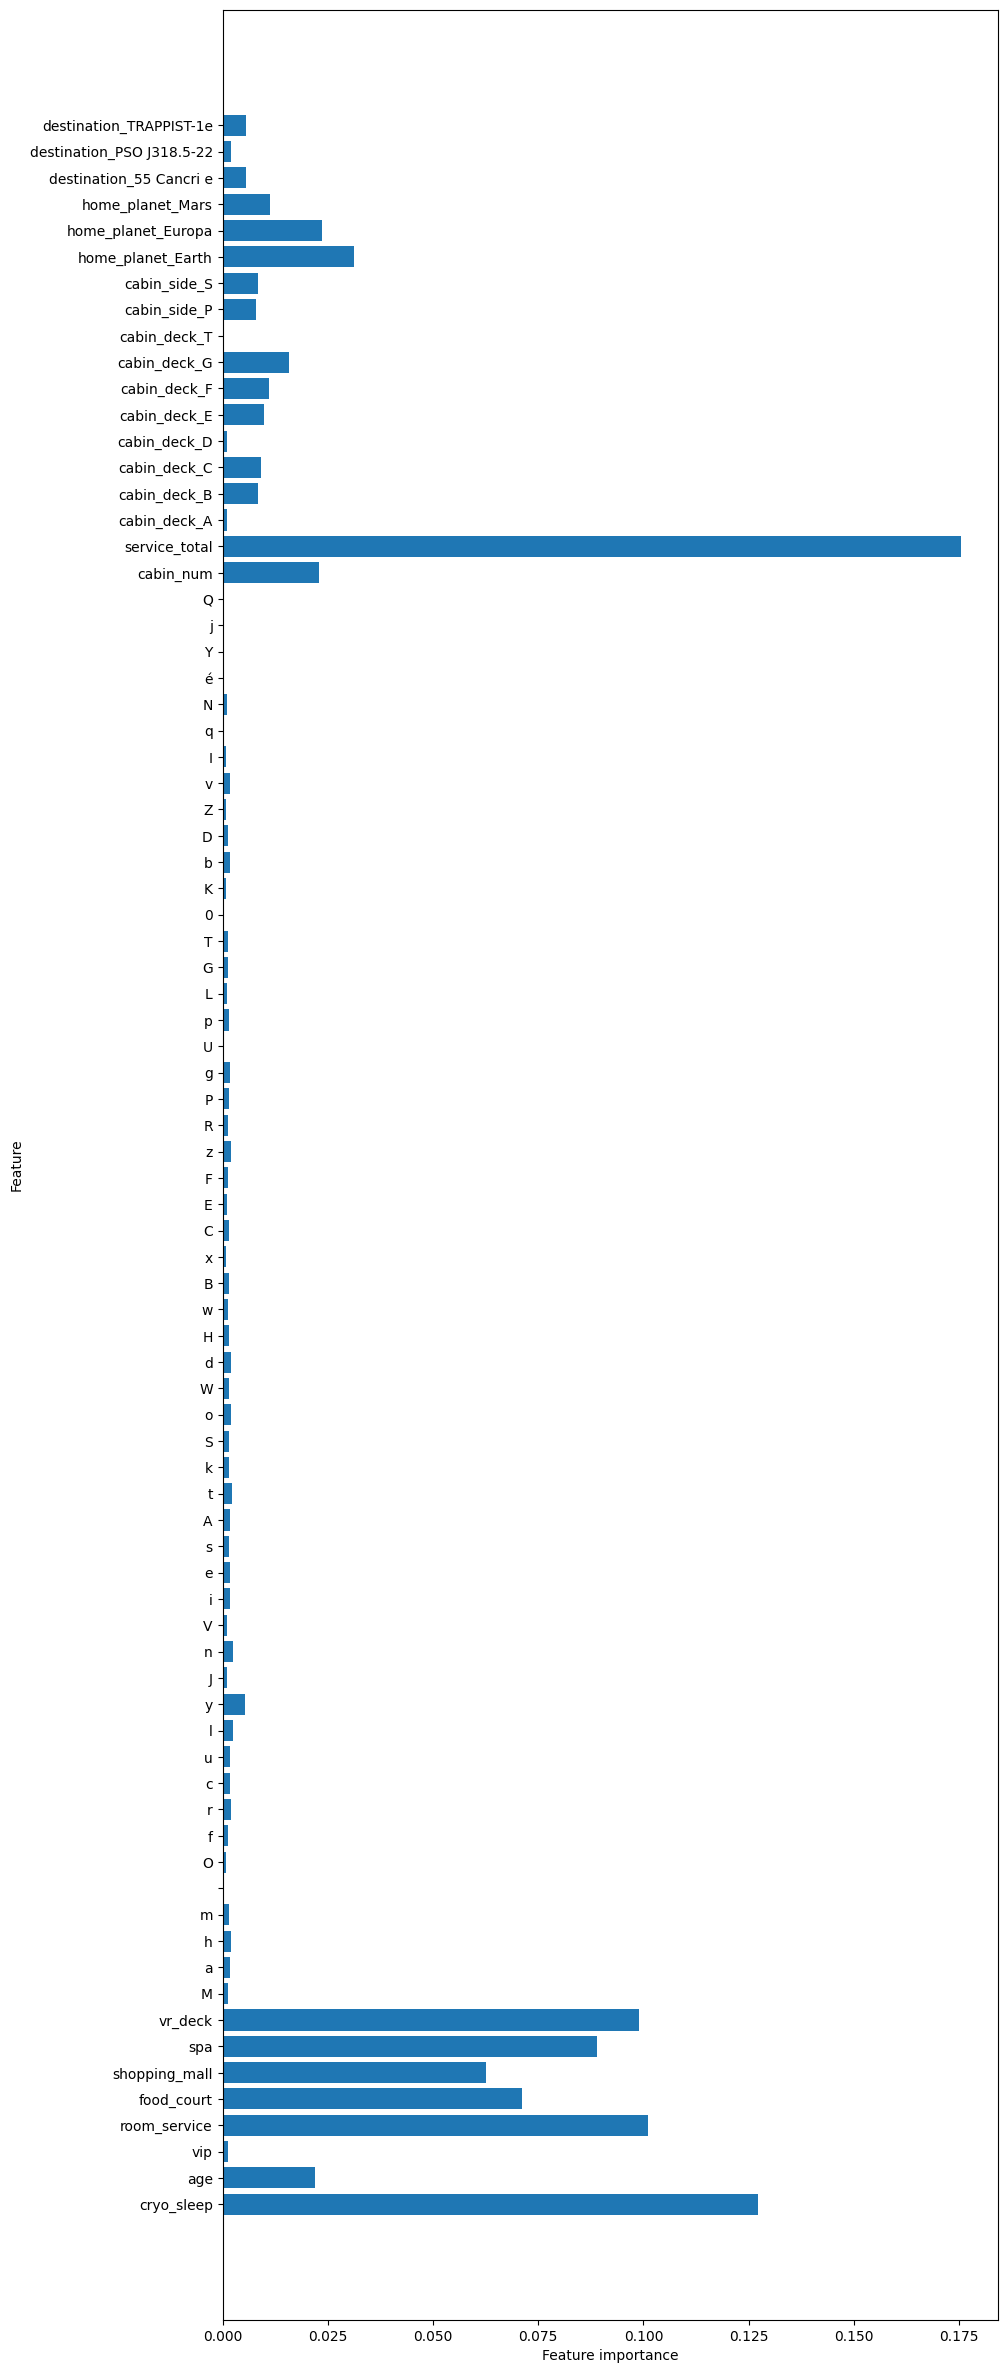

In [12]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, oob_score=True, max_depth=8, criterion='gini')
rf.fit(X, y)
rf.oob_score_

# cross validation
print(f"accuracy = {cross_val_score(rf, X, y, cv=5, scoring='accuracy').mean()}")


# feature importance
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.figure(figsize=(10, 30))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rf)

# feature selection
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rf, threshold=0.1)
sfm.fit(X, y)


In [32]:
# grid search

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
CV_rfc.fit(X, y)
CV_rfc.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   1.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   1.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   1.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   1.1s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   2.3s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   2.2s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   2.5s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   2.3s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   2.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   3.3s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   3.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   3.7s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_e

/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100; total time=   1.4s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=300; total time=   2.9s
[CV] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100; total time=   1.4s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=300; total time=   3.3s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100; total time=   1.5s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=300; total time=   3.7s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=300; total time=   3.5s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=300; total time=   3.5s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200; total time=   2.6s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200; total time=   3.0s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200; total time=   3.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200; total time=   2.5s
[CV] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200; total time=   2.6s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.8s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, n_estimators=300; total time=   3.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, n_estimators=300; total time=   3.4s
[CV] END criterion=gini, max_depth=5, max_features=auto, n_estimators=300; total time=   3.5s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100; total time=   1.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_e

/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=200; total time=   3.3s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   1.6s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   1.8s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=300; total time=   4.4s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=300; total time=   4.2s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   1.6s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=300; total time=   4.4s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=300; total time=   3.7s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=300; total time=   4.1s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   2.6s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   2.3s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   2.6s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   2.9s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   2.5s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   1.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   1.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300; total time=   3.7s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300; total time=   3.9s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300; total time=   3.9s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   1.6s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_e

/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=log2, n_estimators=200; total time=   2.4s
[CV] END criterion=gini, max_depth=6, max_features=log2, n_estimators=200; total time=   2.5s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=100; total time=   1.5s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=log2, n_estimators=300; total time=   3.8s
[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=100; total time=   1.6s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=100; total time=   1.7s
[CV] END criterion=gini, max_depth=6, max_features=log2, n_estimators=300; total time=   3.9s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, n_estimators=300; total time=   4.3s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=log2, n_estimators=300; total time=   3.5s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=log2, n_estimators=300; total time=   3.7s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=100; total time=   1.4s
[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200; total time=   2.4s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200; total time=   2.6s
[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200; total time=   2.7s
[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200; total time=   2.9s
[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200; total time=   2.6s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=300; total time=   3.9s
[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=300; total time=   3.6s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=300; total time=   4.1s
[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=300; total time=   4.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, n_estimators=300; total time=   4.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, n_e

/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=200; total time=   2.8s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=200; total time=   3.3s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100; total time=   1.7s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100; total time=   2.2s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=300; total time=   4.9s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=300; total time=   4.8s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100; total time=   2.0s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=300; total time=   4.9s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100; total time=   1.6s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100; total time=   1.8s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=300; total time=   4.5s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=300; total time=   5.1s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=   2.9s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=   2.7s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=   2.9s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=   2.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=   3.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300; total time=   4.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300; total time=   3.7s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300; total time=   3.9s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100; total time=   1.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_e

/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=log2, n_estimators=200; total time=   2.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, n_estimators=200; total time=   2.3s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.9s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=log2, n_estimators=300; total time=   3.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   1.1s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=log2, n_estimators=300; total time=   3.3s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=8, max_features=log2, n_estimators=300; total time=   3.3s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   1.0s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=log2, n_estimators=300; total time=   3.3s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=log2, n_estimators=300; total time=   3.5s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   1.9s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   2.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   1.9s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   1.8s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   2.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100; total time=   1.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300; total time=   3.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.8s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300; total time=   2.7s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300; total time=   2.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END criterion=entropy, ma

/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=200; total time=   1.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100; total time=   1.2s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=300; total time=   2.8s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=300; total time=   2.6s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=300; total time=   2.5s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=300; total time=   2.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100; total time=   1.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100; total time=   1.2s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=300; total time=   2.7s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200; total time=   2.2s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200; total time=   2.5s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200; total time=   2.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200; total time=   1.9s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200; total time=   2.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=300; total time=   3.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=300; total time=   3.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=300; total time=   3.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=300; total time=   3.0s
[CV] END criterion=entropy, ma

/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200; total time=   1.8s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200; total time=   1.9s
[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100; total time=   1.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=300; total time=   2.9s
[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100; total time=   1.2s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=300; total time=   3.0s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=300; total time=   3.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100; total time=   1.0s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=100; total time=   1.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=300; total time=   2.6s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=300; total time=   2.9s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200; total time=   2.0s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200; total time=   2.4s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200; total time=   2.5s
[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200; total time=   2.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=200; total time=   2.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   1.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300; total time=   2.8s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300; total time=   2.8s
[CV] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=300; total time=   3.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END criterion=entropy, ma

/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=200; total time=   2.0s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=100; total time=   1.3s
[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=300; total time=   3.1s
[CV] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=100; total time=   1.3s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=300; total time=   3.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=300; total time=   2.8s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=100; total time=   1.3s
[CV] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=300; total time=   2.9s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=300; total time=   3.1s
[CV] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=200; total time=   2.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=200; total time=   2.1s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=200; total time=   2.4s
[CV] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=200; total time=   2.3s
[CV] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=200; total time=   2.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100; total time=   1.4s
[CV] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=300; total time=   3.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=300; total time=   2.9s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=300; total time=   3.2s
[CV] END criterion=entropy, ma

/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=200; total time=   2.0s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=200; total time=   2.2s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100; total time=   1.4s
[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100; total time=   1.2s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100; total time=   1.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=300; total time=   3.3s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=300; total time=   3.4s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=300; total time=   3.2s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=300; total time=   3.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100; total time=   1.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100; total time=   1.2s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To kee

[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=300; total time=   3.4s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200; total time=   2.1s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200; total time=   2.5s
[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200; total time=   2.3s


/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200; total time=   2.6s
[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200; total time=   2.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   1.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   1.5s
[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300; total time=   3.4s
[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300; total time=   3.4s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=300; total time=   3.5s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END criterion=entropy, ma

/home/afonsofroes/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 300}

In [47]:
y_pred = rf.predict(proc_test_data)
y_pred = y_pred.astype(bool)
ids = test_data['PassengerId']
submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': y_pred})
submission.to_csv('submission_7.csv', index=False)